In [1]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen

import pandas as pd
import re

In [245]:
# 국민의힘
url = 'http://www.peoplepowerparty.kr/renewal/about/preamble.do'
html = urlopen(url)
soup = BeautifulSoup(html, "lxml")
soup.title

<title>국민의힘 &gt; 강령</title>

In [246]:
km = soup.find('div','txt')
km

<div class="txt">
<ol class="ques_answ newhan_box">
<li>
<p></p><p class="0" style="text-align: center; line-height: 220%; -ms-word-break: keep-all"><span style="font-family: 한컴바탕; font-size: 23pt; font-weight: bold"><br/></span></p>
<p class="0" style="text-align: center; line-height: 220%; -ms-word-break: keep-all"><span style="font-family: 한컴바탕; font-size: 23pt; font-weight: bold">모두의 내일을 위한 약속</span></p>
<p class="0" style="text-align: center; line-height: 220%; font-size: 23pt; font-weight: bold; -ms-word-break: keep-all">     <o:p></o:p></p>
<p class="0" style="text-align: center; line-height: 90%; font-size: 23pt; font-weight: bold; -ms-word-break: keep-all">     <o:p></o:p></p>
<p class="0" style="text-align: right; line-height: 150%; -ms-word-break: keep-all"><span style="letter-spacing: 0pt; font-family: 함초롬바탕; font-size: 15pt; font-weight: bold">【 </span><span lang="EN-US" style="letter-spacing: 0pt; font-size: 15pt; font-weight: bold">2020</span><span style="font-family: 함초

In [247]:
km = km.get_text()
km

'\n\n\n\n모두의 내일을 위한 약속\n  \xa0  \n  \xa0  \n【 2020년 9월 2일 전면개정 】\n  \xa0  \n  \xa0  \n 국민의힘은 모두의 내일을 함께 만들어가는 정당이다. 반만년의 역사와 빛나는 전통을 자랑하는 우리는 3.1 독립운동 정신과 대한민국임시정부의 정통성을 이어받고, 공산주의 침략에 맞서 자유민주주의를 지켜낸 국난극복의 자랑스러운 역사를 가지고 있다. 우리는 하나 된 국민의 힘으로 전쟁의 폐허에서 가난을 극복하고 선진경제를 이룩했으며, 시민의 자발적 참여를 통해 민주화를 성취했다. 우리는 현재에 안주하지 않고 끊임없는 변화와 개혁을 주도해 더 나은 내일을 향해 앞장서 나갈 것이다. \n  \xa0  \n 지금 우리는 세계질서의 대전환과 북한의 핵무장, 지구환경 변화와 거듭되고 있는 질병과 재난, 경제의 질적 변화로 인한 불확실성과 양극화의 심화, 인구절벽 등 중대한 위기 앞에 서 있다. 국가적 위기 해결에 앞장서야 할 정치는 국민이 부여한 권한에 대한 책임과 역할을 다하지 못하고, 오히려 국민 분열을 조장하는 등 사회적 혼란과 함께 정치 불신을 심화 시켜 왔다. 이제 우리는 지난 과거를 반성하고 성찰함과 동시에 다가오는 미래 변화를 선도하고, ‘기회의 나라, 공정한 대한민국’을 만들기 위해 다음과 같이 약속한다. \n  \xa0  \n 우리는 모든 국민이 공정하고 다양한 기회를 누리도록 하는 것이 시대적 과제임을 깊이 인식하고, 입시와 취업, 병역 등 우리 사회 전반에서 반칙과 특권이 허용되지 않도록 한다. 국민 누구나 양질의 교육을 받을 기회를 보장할 것이며, 개인의 존엄과 창의를 실현할 수 있도록 다양한 교육제도를 마련한다. 공정한 시장경제 질서를 확립하여 경제민주화를 구현하고, 사회적 양극화 해소에 앞장서며, 편법과 부정부패에 단호히 대처하여 공동체 신뢰를 회복한다. \n  \xa0  \n 우리는 갈등과 분열을 넘어 국민통합을 위해 노력하며 진영 논리에 따라 과거를 배척하지 않는다. 경제개발 5개년 계획과 새

In [248]:
km = km.replace('\n', ' ')
km = km.replace('\r', ' ')
km = km.replace('\t', ' ')
km = km.replace('\xa0', ' ')
km = km.strip()
km

'모두의 내일을 위한 약속             【 2020년 9월 2일 전면개정 】              국민의힘은 모두의 내일을 함께 만들어가는 정당이다. 반만년의 역사와 빛나는 전통을 자랑하는 우리는 3.1 독립운동 정신과 대한민국임시정부의 정통성을 이어받고, 공산주의 침략에 맞서 자유민주주의를 지켜낸 국난극복의 자랑스러운 역사를 가지고 있다. 우리는 하나 된 국민의 힘으로 전쟁의 폐허에서 가난을 극복하고 선진경제를 이룩했으며, 시민의 자발적 참여를 통해 민주화를 성취했다. 우리는 현재에 안주하지 않고 끊임없는 변화와 개혁을 주도해 더 나은 내일을 향해 앞장서 나갈 것이다.         지금 우리는 세계질서의 대전환과 북한의 핵무장, 지구환경 변화와 거듭되고 있는 질병과 재난, 경제의 질적 변화로 인한 불확실성과 양극화의 심화, 인구절벽 등 중대한 위기 앞에 서 있다. 국가적 위기 해결에 앞장서야 할 정치는 국민이 부여한 권한에 대한 책임과 역할을 다하지 못하고, 오히려 국민 분열을 조장하는 등 사회적 혼란과 함께 정치 불신을 심화 시켜 왔다. 이제 우리는 지난 과거를 반성하고 성찰함과 동시에 다가오는 미래 변화를 선도하고, ‘기회의 나라, 공정한 대한민국’을 만들기 위해 다음과 같이 약속한다.         우리는 모든 국민이 공정하고 다양한 기회를 누리도록 하는 것이 시대적 과제임을 깊이 인식하고, 입시와 취업, 병역 등 우리 사회 전반에서 반칙과 특권이 허용되지 않도록 한다. 국민 누구나 양질의 교육을 받을 기회를 보장할 것이며, 개인의 존엄과 창의를 실현할 수 있도록 다양한 교육제도를 마련한다. 공정한 시장경제 질서를 확립하여 경제민주화를 구현하고, 사회적 양극화 해소에 앞장서며, 편법과 부정부패에 단호히 대처하여 공동체 신뢰를 회복한다.         우리는 갈등과 분열을 넘어 국민통합을 위해 노력하며 진영 논리에 따라 과거를 배척하지 않는다. 경제개발 5개년 계획과 새마을 운동 등 한강의 기적을 이룩한 산업화 세대의 ‘조국 근대화 정신’과 

In [249]:
# 더불어민주당
url = 'https://theminjoo.kr/introduce/rule'
html = urlopen(url)
soup = BeautifulSoup(html, "lxml")
soup.title

<title>더불어민주당</title>

In [250]:
mj = soup.find('div','tap_cnt')
mj

<div class="tap_cnt">
<div class="align_right mgb20">
<a class="file_down" href="/introduce/save_image?name=★220415_더불어민주당_강령당헌당규.pdf" target="_blank">강령·당헌·당규·윤리규범·PDF 다운로드</a>
</div>
<dl class="accordion note-editable">
<dt><a href="javascript:;">&lt; 전 문 &gt;</a></dt>
<dd>
<p arial="" dotum="" font-size:="" gothic="" nanum="" sans-serif="" serif="" style="margin-bottom: 0px; padding: 0px; vertical-align: top; line-height: 20px; word-break: keep-all; color: rgb(34, 34, 34); font-family: " tahoma=""><span style="font-family: Tahoma;">우리는 대한민국임시정부의 자주독립정신과 헌법적 법통, 그리고 4·19혁명, 부마민주항쟁, 5·18민주화운동, 6·10민주항쟁, 촛불시민혁명의 위대한 민주주의 정신을 계승한다. 대한민국을 이끌어 온 국민의 헌신과 노력을 존중하며, 서민과 중산층의 이해를 대변하고, 모든 사람의 권리 향상을 위해 노력한다. 책임있는 정치세력으로서 민주당정부의 정치· 경제·사회 개혁과 남북 화해·협력의 성과를 계승하여 평화와 번영의 새로운 시대를 열어 간다.</span></p><p arial="" dotum="" font-size:="" gothic="" nanum="" sans-serif="" serif="" style="margin-top: 15px; margin-bottom: 0px; padding: 0px; vertical-align: top; line-height: 20px; word-break: keep-all; color

In [251]:
mj = mj.get_text()
mj

'\n\n강령·당헌·당규·윤리규범·PDF 다운로드\n\n\n< 전 문 >\n\n우리는 대한민국임시정부의 자주독립정신과 헌법적 법통, 그리고 4·19혁명, 부마민주항쟁, 5·18민주화운동, 6·10민주항쟁, 촛불시민혁명의 위대한 민주주의 정신을 계승한다. 대한민국을 이끌어 온 국민의 헌신과 노력을 존중하며, 서민과 중산층의 이해를 대변하고, 모든 사람의 권리 향상을 위해 노력한다. 책임있는 정치세력으로서 민주당정부의 정치· 경제·사회 개혁과 남북 화해·협력의 성과를 계승하여 평화와 번영의 새로운 시대를 열어 간다.대한민국은 분단의 어려움 속에서도 산업화와 민주화에 성공한 자랑스러운 역사를 가지고 있다. 그러나 국가주도의 압축성장 과정에서 재벌중심의 경제구조와 노동자 배제가 고착화되었으며, 세계적인 신자유주의 물결 속에서 불공정한 경제구조가 지속됨에 따라 사회·경제적 양극화가 심화되었다. 1987년 이후 민주화의 과정 속에서 절차적 민주주의 는 성과를 거두었지만, 국민주권원리와 모든 국민의 삶을 보장하는 실질적 민주주의로 확장되지 못한 한계도 있었다. 지금 대한민국은 대전환의 시대에 직면해 있다. 전 세계적인 저성장 기조와 감염병 등에 따른 경제위기는 고용과 일자리를 위협하고 있으며 사회·경제적 불확실성을 심화시키고 있다. 한반도 비핵화와 평화체제 구축의 과정이 진행되고 있으나, 한반도의 평화는 아직 굳건하지 못한 상태이다. 미‧중 전략적 경쟁의 심화 등 동북아 정세의 불안정성이 커지 는 가운데 한반도 평화와 통일을 위한 우리의 창의적이고 주도적인 역할이 필요한 시점 이다. 유능한 정당, 책임 있는 정부를 통해 혁신과 성장을 지속하고 사회·경제적 양극화 를 개선하는 노력을 병행하며, 시민의 권리를 보호하고 안전하고 평화로운 삶을 보장하 는 것이 우리의 시대적 과제이다. 이제 우리는 ‘공정, 안전, 포용, 번영, 평화’를 우리 시대의 핵심가치로 삼아 모든 사람이 함께 잘 사는 ‘혁신적 포용국가’를 실현할 것이다.첫째, 공정하고 정의로운 사회를 만든다. 정치, 경제,

In [252]:
mj = mj.replace('\n', ' ')
mj = mj.replace('\r', ' ')
mj = mj.replace('\t', ' ')
mj = mj.replace('\xa0', ' ')
mj = mj.strip()
mj

'강령·당헌·당규·윤리규범·PDF 다운로드   < 전 문 >  우리는 대한민국임시정부의 자주독립정신과 헌법적 법통, 그리고 4·19혁명, 부마민주항쟁, 5·18민주화운동, 6·10민주항쟁, 촛불시민혁명의 위대한 민주주의 정신을 계승한다. 대한민국을 이끌어 온 국민의 헌신과 노력을 존중하며, 서민과 중산층의 이해를 대변하고, 모든 사람의 권리 향상을 위해 노력한다. 책임있는 정치세력으로서 민주당정부의 정치· 경제·사회 개혁과 남북 화해·협력의 성과를 계승하여 평화와 번영의 새로운 시대를 열어 간다.대한민국은 분단의 어려움 속에서도 산업화와 민주화에 성공한 자랑스러운 역사를 가지고 있다. 그러나 국가주도의 압축성장 과정에서 재벌중심의 경제구조와 노동자 배제가 고착화되었으며, 세계적인 신자유주의 물결 속에서 불공정한 경제구조가 지속됨에 따라 사회·경제적 양극화가 심화되었다. 1987년 이후 민주화의 과정 속에서 절차적 민주주의 는 성과를 거두었지만, 국민주권원리와 모든 국민의 삶을 보장하는 실질적 민주주의로 확장되지 못한 한계도 있었다. 지금 대한민국은 대전환의 시대에 직면해 있다. 전 세계적인 저성장 기조와 감염병 등에 따른 경제위기는 고용과 일자리를 위협하고 있으며 사회·경제적 불확실성을 심화시키고 있다. 한반도 비핵화와 평화체제 구축의 과정이 진행되고 있으나, 한반도의 평화는 아직 굳건하지 못한 상태이다. 미‧중 전략적 경쟁의 심화 등 동북아 정세의 불안정성이 커지 는 가운데 한반도 평화와 통일을 위한 우리의 창의적이고 주도적인 역할이 필요한 시점 이다. 유능한 정당, 책임 있는 정부를 통해 혁신과 성장을 지속하고 사회·경제적 양극화 를 개선하는 노력을 병행하며, 시민의 권리를 보호하고 안전하고 평화로운 삶을 보장하 는 것이 우리의 시대적 과제이다. 이제 우리는 ‘공정, 안전, 포용, 번영, 평화’를 우리 시대의 핵심가치로 삼아 모든 사람이 함께 잘 사는 ‘혁신적 포용국가’를 실현할 것이다.첫째, 공정하고 정의로운 사회를 만든다. 정치, 경제, 사회 각 부문마

### 워드클라우드 시작

In [253]:
import nltk
from konlpy.tag import Kkma
from konlpy.tag import Okt

In [254]:
okt = Okt()

>국민의힘

In [255]:
# 트위터 형태소 분석 후 명사만 추출
km_nouns = okt.nouns(km)
len(km_nouns)

2727

In [256]:
km_nouns[:10]

['모두', '내일', '위', '약속', '전면', '개정', '국민', '힘', '모두', '내일']

In [257]:
one_words = []
tow_words = []
etc_words = []

for noun in km_nouns:
    if len(noun) == 1:
        one_words.append(noun)
    elif len(noun) == 2:
        tow_words.append(noun)
    else:
        etc_words.append(noun)
        
len(one_words), len(tow_words), len(etc_words)

(294, 2085, 348)

In [258]:
one_words = list(set(one_words))
tow_words = list(set(tow_words))
etc_words = list(set(etc_words))

len(one_words), len(tow_words), len(etc_words)

(84, 722, 204)

In [259]:
for word in one_words:
    print(word, end='\t')

상	질	남	못	융	초	귀	뒤	선	적	연	불	감	데	온	마	일	발	힘	중	임	삶	예	최	견	이	눈	관	로	음	앞	후	인	망	것	권	제	곳	법	내	강	돈	비	난	분	차	각	친	창	손	과	업	브	집	함	그	간	별	향	점	직	의	현	품	수	위	를	학	때	긱	살	전	등	층	실	물	자	산	및	핵	끝	더	틀	하	

In [288]:
stopwords = []
stop_words = ['위해','누구','모든','모두']
stopwords.extend(one_words)
stopwords.extend(stop_words)
len(stopwords)

88

In [289]:
# stop_words 빼기
km_nouns = [ word for word in km_nouns if word not in stop_words ]
len(km_nouns)

2362

In [290]:
km_nouns[:10]

['내일', '약속', '전면', '개정', '국민', '내일', '정당', '반만년', '역사', '전통']

In [291]:
km  = nltk.Text(km_nouns, name='국민의힘')
type(km), len(km)

(nltk.text.Text, 2362)

In [292]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [293]:
data = km.vocab().most_common(100)
len(data)

100

In [294]:
# data를 딕셔너리 형태로 변환
dict_data = dict(data)
len(dict_data)

100

In [295]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from PIL import Image
from wordcloud import ImageColorGenerator

In [296]:
# 이미지파일 numpy로 읽기
shape_img = np.array(Image.open('images/km.png'))
cloud_img = ImageColorGenerator(shape_img)

In [297]:
# km_jpg

(-0.5, 126.5, 121.5, -0.5)

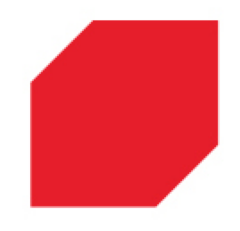

In [298]:
# plt.imshow()는 수치 데이터 -> image데이터로 변환해줌
plt.imshow(km_jpg, cmap=plt.cm.gray)
plt.axis('off')     # on/off

In [301]:
help(WordCloud)

Help on class WordCloud in module wordcloud.wordcloud:

class WordCloud(builtins.object)
 |  WordCloud(font_path=None, width=400, height=200, margin=2, ranks_only=None, prefer_horizontal=0.9, mask=None, scale=1, color_func=None, max_words=200, min_font_size=4, stopwords=None, random_state=None, background_color='black', max_font_size=None, font_step=1, mode='RGB', relative_scaling='auto', regexp=None, collocations=True, colormap=None, normalize_plurals=True, contour_width=0, contour_color='black', repeat=False, include_numbers=False, min_word_length=0, collocation_threshold=30)
 |  
 |  Word cloud object for generating and drawing.
 |  
 |  Parameters
 |  ----------
 |  font_path : string
 |      Font path to the font that will be used (OTF or TTF).
 |      Defaults to DroidSansMono path on a Linux machine. If you are on
 |      another OS or don't have this font, you need to adjust this path.
 |  
 |  width : int (default=400)
 |      Width of the canvas.
 |  
 |  height : int (defaul

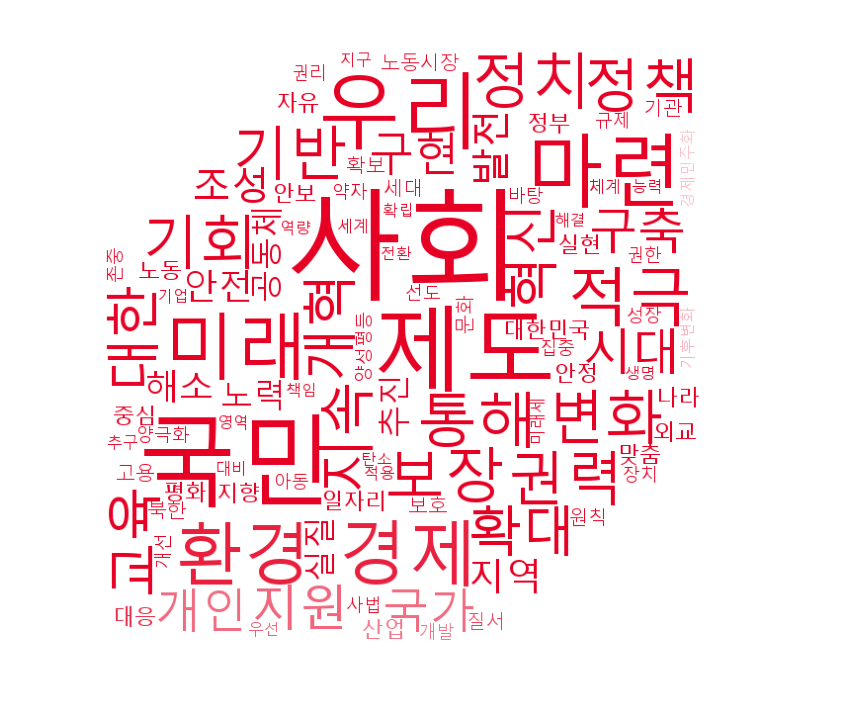

In [313]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                     width = 300,
                     height = 300,
                     relative_scaling = 0.6,
                     mask = shape_img, 
#                      color_func=lambda *args, **kwargs: "blue",
                     color_func = lambda *args, **kwargs: (50,100,150),
                     background_color = 'white',
                     min_font_size=3, max_font_size=120).generate_from_frequencies(dict_data)

save_img = 'wordcloud/km_fin.png'
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud.recolor(color_func=cloud_img))
plt.axis('off')
plt.savefig(save_img)

>더불어민주당

In [314]:
# 트위터 형태소 분석 후 명사만 추출
mj_nouns = okt.nouns(mj)
len(mj_nouns)

4826

In [315]:
mj_nouns[:10]

['강령', '헌', '규', '윤리', '규범', '다운로드', '전', '문', '우리', '대한민국']

In [316]:
one_words = []
tow_words = []
etc_words = []

for noun in mj_nouns:
    if len(noun) == 1:
        one_words.append(noun)
    elif len(noun) == 2:
        tow_words.append(noun)
    else:
        etc_words.append(noun)
        
len(one_words), len(tow_words), len(etc_words)

(548, 3655, 623)

In [317]:
one_words = list(set(one_words))
tow_words = list(set(tow_words))
etc_words = list(set(etc_words))

len(one_words), len(tow_words), len(etc_words)

(118, 815, 238)

In [318]:
for word in one_words:
    print(word, end='\t')

북	통	당	뿐	질	역	상	입	남	못	융	초	력	체	익	속	선	적	연	불	감	단	고	밖	경	회	온	정	패	일	힘	중	꿈	삶	최	견	이	로	알	증	망	줄	것	권	제	방	장	법	내	추	강	책	난	원	김	각	차	편	친	창	노	소	균	과	업	집	함	특	간	활	별	응	걸	기	치	시	포	사	므	직	의	현	량	수	위	를	학	때	형	반	전	구	등	군	재	문	해	층	실	물	자	농	산	국	화	및	개	범	성	끝	안	민	규	계	더	처	하	헌	

In [319]:
stopwords = []
# stop_words = ['제', '월', '일','조','수','때','그','이','바','및','안']
stopwords.extend(one_words)
len(stopwords)

118

In [320]:
# stop_words 빼기
mj_nouns = [ word for word in mj_nouns if word not in stop_words ]
len(mj_nouns)

4741

In [321]:
mj_nouns[:10]

['강령', '헌', '규', '윤리', '규범', '다운로드', '전', '문', '우리', '대한민국']

In [322]:
mj  = nltk.Text(mj_nouns, name='더불어민주당')
type(mj), len(mj)

(nltk.text.Text, 4741)

In [325]:
data = mj.vocab().most_common(100)
len(data)

100

In [326]:
# data를 딕셔너리 형태로 변환
dict_data = dict(data)
len(dict_data)

100

In [335]:
# 이미지파일 numpy로 읽기
shape_img = np.array(Image.open('images/mj.png'))
cloud_img = ImageColorGenerator(shape_img)

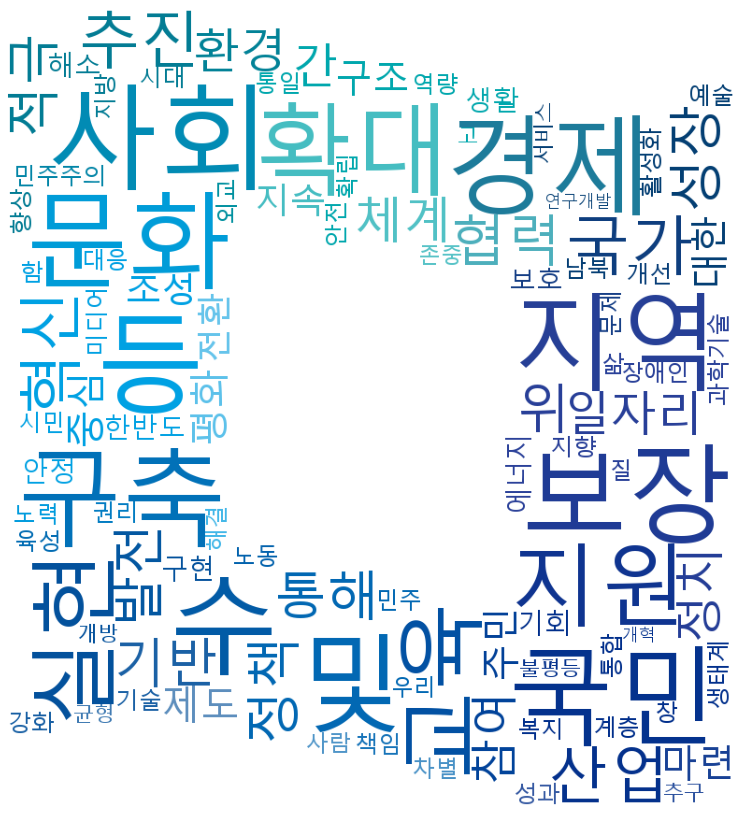

In [338]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                     width = 50,
                     height = 50,
                     relative_scaling = 0.1,
                     mask = shape_img, 
                     background_color = 'white',
                     min_font_size=3, max_font_size=120).generate_from_frequencies(dict_data)

save_img = 'wordcloud/mj_fin.png'
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud.recolor(color_func=cloud_img))
plt.axis('off')
plt.savefig(save_img)